In [3]:
import chess
import chess.pgn
import random
import numpy as np
import pickle
import os
import chess.engine

In [4]:
def create_algebraic_board_from_chess_board(chess_board):
    # Initialize an empty 12x8x8 board
    board = np.zeros((12, 8, 8), dtype=int)

    # Piece mapping to values and channels
    piece_to_channel = {
        chess.PAWN: 0, chess.KNIGHT: 1, chess.BISHOP: 2, chess.ROOK: 3, chess.QUEEN: 4, chess.KING: 5,
    }

    piece_values = {
        chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 10,
    }

    # Populate the board with values based on the piece positions
    for square in chess.SQUARES:
        piece = chess_board.piece_at(square)
        if piece:
            row = 7 - chess.square_rank(square)  # Convert rank to row
            col = chess.square_file(square)  # Convert file to column
            piece_type = piece.piece_type
            channel = piece_to_channel[piece_type]
            value = piece_values[piece_type] * (1 if piece.color == chess.WHITE else -1)
            board[channel + (0 if piece.color == chess.WHITE else 6), row, col] = value

    return board

#create_algebraic_board_from_chess_board(board)

In [ ]:
def extract_positions_from_game(game, num_positions=10):
    # Convert the game into a list of boards (excluding the first move)
    boards = []
    board = game.board()

    for move in game.mainline_moves():
        board.push(move)
        boards.append(board.copy())

    # Exclude the first move and randomly sample 10 positions
    if len(boards) > 1:
        sampled_boards = random.sample(boards[1:], min(num_positions, len(boards) - 1))
    else:
        sampled_boards = []

    return sampled_boards
    # return [create_algebraic_board_from_chess_board(b) for b in sampled_boards]

In [ ]:
def process_x_train_pgn_file(input_pkl_path,output_npy_path):
    # Bước 1: Tải dữ liệu từ file .pkl
    with open(input_pkl_path, "rb") as file:
        games_positions = pickle.load(file)

    # Bước 2: Chuyển đổi các Board thành dạng bảng chữ số
    for board in games_positions:
        algebraic_position = create_algebraic_board_from_chess_board(board)

        # Append kết quả vào file .npy
        with open(output_npy_path, 'ab') as f:
            np.save(f, algebraic_position)

In [ ]:
def process_positions_pgn_file(pgn_filename,num_positions_per_game=10):
    positions = []

    with open(pgn_filename) as pgn_file:
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break

            position = extract_positions_from_game(game, num_positions=num_positions_per_game)
            positions.extend(position)

    return positions

In [ ]:
x_train_1 = np.load("/content/drive/MyDrive/3000000games_x_train.npy")

In [ ]:
x_train_2 = np.load("/content/drive/MyDrive/3000000games_x_train_2.npy")

In [ ]:
x_train_3 = np.load("/content/drive/MyDrive/3000000games_x_train_3.npy")

In [ ]:
x_train_4 = np.load("/content/drive/MyDrive/3000000games_x_train_4_1_1.npy")

In [ ]:
x_train = np.concatenate((x_train_1, x_train_2, x_train_3,x_train_4), axis=0)

In [ ]:
del x_train_1,x_train_2,x_train_3,x_train_4

In [ ]:
x_train.shape

(700003, 12, 8, 8)

In [ ]:
print(x_train[0])

[[[  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   1   0   0]
  [  0   0   0   0   0   0   0   1]
  [  0   0   0   0   0   0   1   0]
  [  0   0   0   0   0   0   0   0]]

 [[  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]]

 [[  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]]

 [[  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0]
  [  0   0   0   0   0

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/3000000games.csv")

y_train = df['eval']
y_train = y_train[:700003]
y_train.shape

(700003,)

In [ ]:
del df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Tạo một đối tượng MinMaxScaler với feature_range từ 0 đến 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Convert the Pandas Series to a NumPy array and then reshape
y_train_array = y_train.to_numpy().reshape(-1, 1)

# Áp dụng scaling
y_train_scaled = scaler.fit_transform(y_train_array)

# Nếu muốn y_train_scaled trở về mảng 1D, sử dụng ravel()
y_train_scaled = y_train_scaled.ravel()

In [ ]:
del y_train_array,y_train

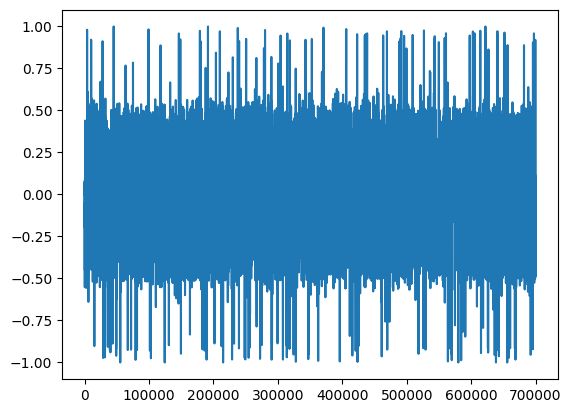

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train_scaled)
plt.show()

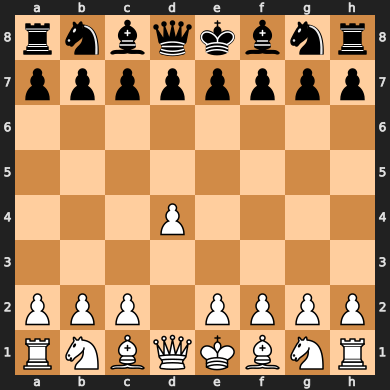

In [ ]:
def create_chess_board_from_array(board_array):
    board = chess.Board()
    board.clear()  # Xóa bàn cờ mặc định để bắt đầu từ bàn cờ trống

    # Mapping từ kênh trong mảng sang quân cờ trong chess
    channel_to_piece = {
        0: chess.PAWN, 1: chess.KNIGHT, 2: chess.BISHOP,
        3: chess.ROOK, 4: chess.QUEEN, 5: chess.KING,
    }

    for channel in range(12):
        piece_type = channel_to_piece[channel % 6]  # Loại quân cờ
        color = chess.WHITE if channel < 6 else chess.BLACK  # Màu của quân cờ

        for row in range(8):
            for col in range(8):
                value = board_array[channel, row, col]
                if value != 0:
                    square = chess.square(col, 7 - row)
                    piece = chess.Piece(piece_type, color)
                    board.set_piece_at(square, piece)

    return board

sample_board = create_chess_board_from_array(x_train[0])
display(sample_board)

In [ ]:
def assign_and_normalize_cp(depth=10, cp_file_path="cp_values.npy", er_file_path="er_values.npy"):
    index = 0

    # Tạo file nếu chưa tồn tại
    if not os.path.exists(cp_file_path):
        np.save(cp_file_path, np.array([], dtype=int))
    if not os.path.exists(er_file_path):
        np.save(er_file_path, np.array([], dtype=int))

    # Đọc mảng hiện tại từ file npy
    cp_values = np.load(cp_file_path, allow_pickle=True)
    er_values = np.load(er_file_path, allow_pickle=True)

    # Chạy qua các bàn cờ và cập nhật giá trị
    for temp_board in games_positions:
        print(index)
        cp = stockfish_score(temp_board, depth, stockfish_path)
        if cp is not None:
            cp_values = np.append(cp_values, cp)
            np.save(cp_file_path, cp_values)
        else:
            er_values = np.append(er_values, index)
            np.save(er_file_path, er_values)

        index += 1

In [ ]:
assign_and_normalize_cp()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def create_cnn(input_shape):
    cnn_input = layers.Input(shape=input_shape)

    # Lớp tích chập 1: 20 bộ lọc 5x5, ReLU, BatchNormalization, Dropout 20%
    x = layers.Conv2D(20, (5, 5), activation='relu', kernel_initializer='he_normal')(cnn_input)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Lớp tích chập 2: 50 bộ lọc 3x3, ReLU, BatchNormalization, Dropout 20%
    x = layers.Conv2D(50, (3, 3), activation='relu', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Flatten: Chuyển từ 2D sang 1D
    x = layers.Flatten()(x)

    # Fully Connected Layer: 500 units, ReLU, BatchNormalization, Dropout 20%
    x = layers.Dense(500, activation='relu', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Lớp cuối cùng: 1 unit với activation là sigmoid
    final_output = layers.Dense(1, activation='sigmoid')(x)

    # Tạo mô hình CNN
    cnn_model = models.Model(inputs=cnn_input, outputs=final_output)

    return cnn_model


In [ ]:
cnn_model = create_cnn((12, 8, 8))

cnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 12, 8, 8)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 8, 4, 20)            │           4,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 4, 20)            │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 2, 50)            │           9,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 2, 50)            │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 2, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         300,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 500)                 │           2,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 316,351 (1.21 MB)

 Trainable params: 315,211 (1.20 MB)

 Non-trainable params: 1,140 (4.45 KB)

In [ ]:
from sklearn.model_selection import train_test_split

X_to_train, X_to_test, y_to_train, y_to_test = train_test_split(
    x_train, y_train_scaled, test_size=0.2, random_state=42
)


In [ ]:
del x_train,y_train_scaled

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Tạo callback EarlyStopping để dừng huấn luyện nếu val_loss không cải thiện
early_stopping_callback = EarlyStopping(
    monitor='val_loss',    # Theo dõi 'val_loss'
    patience=6,            # Số epoch không cải thiện trước khi dừng
    mode='min',            # Giảm thiểu 'val_loss'
    verbose=1,              # In thông báo khi huấn luyện dừng
    min_delta=1e-7  # Chỉ dừng nếu val_loss không giảm ít nhất 0.0001
)

# Train the model
history = cnn_model.fit(X_to_train, y_to_train,
                    epochs=30,  # Adjust as needed
                    batch_size=64,
                    validation_data=(X_to_test, y_to_test),
                    callbacks=[early_stopping_callback])

Epoch 1/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.2208 - mean_absolute_error: 0.4632 - val_loss: 0.1440 - val_mean_absolute_error: 0.3730
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1273 - mean_absolute_error: 0.3492 - val_loss: 0.0909 - val_mean_absolute_error: 0.2941
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0821 - mean_absolute_error: 0.2782 - val_loss: 0.0641 - val_mean_absolute_error: 0.2443
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0591 - mean_absolute_error: 0.2335 - val_loss: 0.0488 - val_mean_absolute_error: 0.2108
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0456 - mean_absolute_error: 0.2028 - val_loss: 0.0393 - val_mean_absolute_error: 0.1870
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0372 - mean_absolute_error: 0.1807 - val_loss: 0.0331 - val_mean_absolute_error: 0.1694
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0314 - mean_absolute_

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

def create_mlp(input_shape):
    model = models.Sequential()

    # Flatten đầu vào từ (12, 8, 8) thành (768)
    model.add(layers.Flatten(input_shape=input_shape))

    # Lớp ẩn đầu tiên với Batch Normalization và ELU activation
    model.add(layers.Dense(2048))
    model.add(layers.BatchNormalization())
    model.add(layers.ELU())

    # Lớp ẩn thứ hai với Batch Normalization và ELU activation
    model.add(layers.Dense(2048))
    model.add(layers.BatchNormalization())
    model.add(layers.ELU())

    # Lớp ẩn thứ ba với Batch Normalization và ELU activation
    model.add(layers.Dense(2048))
    model.add(layers.BatchNormalization())
    model.add(layers.ELU())

    # Lớp đầu ra
    model.add(layers.Dense(1, activation='linear'))  # Giả sử đầu ra là một giá trị liên tục

    return model

In [ ]:
input_shape = (12, 8, 8)
model = create_mlp(input_shape)

# Cài đặt SGD với các tham số được cung cấp
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.7, nesterov=True)

# Biên dịch mô hình
model.compile(optimizer=optimizer, loss='mse')

# Tóm tắt mô hình
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu (ELU)                            │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_1 (ELU)                          │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_2 (ELU)                          │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,994,241 (38.13 MB)

 Trainable params: 9,981,953 (38.08 MB)

 Non-trainable params: 12,288 (48.00 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Tạo callback EarlyStopping để dừng huấn luyện nếu val_loss không cải thiện
early_stopping_callback = EarlyStopping(
    monitor='val_loss',    # Theo dõi 'val_loss'
    patience=6,            # Số epoch không cải thiện trước khi dừng
    mode='min',            # Giảm thiểu 'val_loss'
    verbose=1,              # In thông báo khi huấn luyện dừng
    min_delta=1e-7  # Chỉ dừng nếu val_loss không giảm ít nhất 0.0001
)

# Huấn luyện mô hình với callback EarlyStopping
history_2 = model.fit(
    X_to_train, y_to_train,
    epochs=500,               # Số lần lặp lại (epochs)
    batch_size=256,          # Kích thước batch
    validation_data=(X_to_test, y_to_test),  # Dữ liệu kiểm tra
    callbacks=[early_stopping_callback]  # Chỉ thêm EarlyStopping callback
)

Epoch 1/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 0.2008 - val_loss: 0.0142
Epoch 2/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: 0.0131 - val_loss: 0.0094
Epoch 3/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 4/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 5/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 6/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 7/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 8/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 9/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 10/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 11/500
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 12

In [ ]:
model.save('/content/drive/MyDrive/mlp_chess_model.keras')

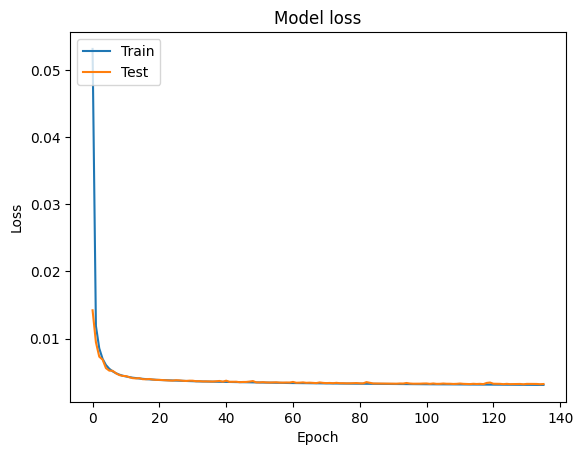

In [ ]:
# prompt: plotting history

# Plot training & validation loss values
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [5]:
from tensorflow.keras.models import load_model
model_path = '/content/drive/MyDrive/mlp_chess_model.keras'
model = load_model(model_path)

In [6]:
def parse_move(board, move_str):
    """
    Parses a move string like 'e2 e4' or 'Bd3' into a UCI move.
    """
    try:
        # First, try to parse a long algebraic move (like 'e2 e4')
        move = chess.Move.from_uci(move_str.replace(" ", ""))
        if move in board.legal_moves:
            return move
    except:
        pass

    # If the first method fails, try to parse the move as a short algebraic notation (like 'Bd3')
    try:
        move = board.parse_san(move_str)
        if move in board.legal_moves:
            return move
    except:
        pass

    return None

In [26]:
def get_move_from_model(model, board,turn):
    best_score = None
    best_move = None

    moves_list = []
    moves_score = []

    for move in board.legal_moves:
        board.push(move)
        moves_list.append(move)

        # Chuyển đổi trạng thái bàn cờ thành định dạng đầu vào của mô hình
        #print(board)
        board_state = create_algebraic_board_from_chess_board(board)
        board_state = board_state.reshape(1, *board_state.shape)  # Thêm kích thước batch

        # Dự đoán điểm số cho nước đi này
        score = model.predict(board_state)[0, 0]
        #print("Score: ",score)
        moves_score.append(score)

        board.pop()

    print("Turn: ",turn)
    print("Moves: ",moves_list)
    print("Scores: ",moves_score)

    if turn == "Black":
        # Get the minimum score index
        min_index = np.argmin(moves_score)
        best_move = moves_list[min_index]
        best_score = moves_score[min_index]
    elif turn == "White":
        # Get the maximum score index
        max_index = np.argmax(moves_score)
        best_move = moves_list[max_index]
        best_score = moves_score[max_index]

    return best_move, best_score

In [29]:
def play_chess_game():
    board = chess.Board()
    print("Welcome to Chess!")
    model_turn = None

    # Lựa chọn bên cho người chơi
    player_color = input("Do you want to play as White or Black? (W/B): ").strip().upper()

    if player_color == 'W':
        print("You are playing as White.")
        player_turn = True
        model_turn = "Black"
    elif player_color == 'B':
        print("You are playing as Black.")
        player_turn = False
        model_turn = "White"
    else:
        print("Invalid choice. Defaulting to White.")
        player_color = 'W'
        player_turn = True

    while not board.is_game_over():
        # Display the current board
        print(board)

        if player_turn:  # Player's move
            while True:
                user_move_str = input("Enter your move (e.g., e2 e4 or Bd3): ")
                user_move = parse_move(board, user_move_str)
                if user_move:
                    board.push(user_move)
                    break
                else:
                    print("Invalid move, try again.")
        else:  # AI's move using Minimax
            print("AI is thinking...")
            ai_move, best_score_ai = get_move_from_model(model, board,model_turn)
            print("AI's move:", ai_move)
            board.push(ai_move)
            print("Best score by AI:", best_score_ai)

        # Alternate turn
        player_turn = not player_turn

    print("Game over!")
    print(board.result())

play_chess_game()

Welcome to Chess!
Do you want to play as White or Black? (W/B): W
You are playing as White.
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Enter your move (e.g., e2 e4 or Bd3): d4
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
AI is thinking...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━